# **Part 1: Text Processing and Exploratory Data Analysis**

## 0. Preparation

0.1 *Import libraries*

In [1]:
import nltk
nltk.download('stopwords')
from collections import defaultdict
from array import array
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import math
import numpy as np
import collections
from numpy import linalg as la
import string
import json
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import spacy
from textblob import TextBlob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0.2 *Connect to Google Drive*

In [2]:
from google.colab import drive
drive.mount('/content/drive')
docs_path = '/content/drive/Shareddrives/IRWA Labs/PROJECT/IRWA - PROJECT DATA/farmers-protest-tweets.json' # modify path if necessary

Mounted at /content/drive


0.3 *Read and preprocess tweets lines*

In [3]:
with open(docs_path) as fp:
    lines = fp.readlines()
lines = [l.strip().replace(' +', ' ') for l in lines]

0.4 *Load and map tweets with IDs*

In [4]:
excel_data = pd.read_csv('/content/drive/Shareddrives/IRWA Labs/PROJECT/IRWA - PROJECT DATA/tweet_document_ids_map.csv') # change path if necessary
tweet_id_to_doc_id = dict(zip(excel_data['id'], excel_data['docId']))

## 1. Text Processing

1.1 *Processing tweets (clean and normalize the content)*

In [5]:
def build_terms(line):
    stemmer = PorterStemmer()
    stop_words = set(stopwords.words("english"))

    try:
        tweet_data = json.loads(line)
    except json.JSONDecodeError:
        print(f"Error: {line}")
        return None

    if tweet_data.get("lang") != "en": # only filter English tweets
        return None

    #Relevant information
    tweet_content = tweet_data.get("content", "")
    tweet_date = tweet_data.get("date", "")
    tweet_likes = tweet_data.get("likeCount", 0)
    tweet_retweets = tweet_data.get("retweetCount", 0)
    tweet_url = tweet_data.get("url", "")
    id = tweet_data.get("id", "")
    doc_id = tweet_id_to_doc_id.get(int(id))

    #Lowercase
    line = tweet_content.lower()

    #Tokenize
    line = line.split()

    #Punctuation signs
    line = [x.translate(str.maketrans('', '', string.punctuation)) for x in line]

    #Eliminate #
    hashtags = [word for word in tweet_content.split() if word.startswith('#')]

    #Stopwords
    line = [x for x in line if x not in stop_words and x]

    #Steaming
    line = [stemmer.stem(x) for x in line]

    #Return relevant information
    return {
        "tweet": line,
        "date": tweet_date,
        "hashtags": hashtags,
        "likes": tweet_likes,
        "retweets": tweet_retweets,
        "url": tweet_url,
        "id": id,
        "doc_id": doc_id
    }

1.2 *Apply text processing to the first tweet*

In [6]:
build_terms(lines[0])

{'tweet': ['world',
  'progress',
  'indian',
  'polic',
  'govt',
  'still',
  'tri',
  'take',
  'india',
  'back',
  'horrif',
  'past',
  'tyranni',
  'narendramodi',
  'delhipolic',
  'shame',
  'modidontsellfarm',
  'farmersprotest',
  'freenodeepkaur',
  'httpstcoes3kn0iqaf'],
 'date': '2021-02-24T09:23:35+00:00',
 'hashtags': ['#ModiDontSellFarmers', '#FarmersProtest', '#FreeNodeepKaur'],
 'likes': 0,
 'retweets': 0,
 'url': 'https://twitter.com/ArjunSinghPanam/status/1364506249291784198',
 'id': 1364506249291784198,
 'doc_id': 'doc_0'}

1.3 *Apply text processing to all tweets and count the words in each tweet*

In [7]:
processed_tweets = []
total_words = []
for line in lines:
    processed_tweet = build_terms(line)
    if processed_tweet:
        processed_tweets.append(processed_tweet)
        total_words.append(len(processed_tweet['tweet']))

In [8]:
n_tweets = len(processed_tweets)
print(f"Total number of processed tweets: {n_tweets}")

Total number of processed tweets: 48429


## 2. Exploratory Data Analysis

2.1 *Word counting distribution*

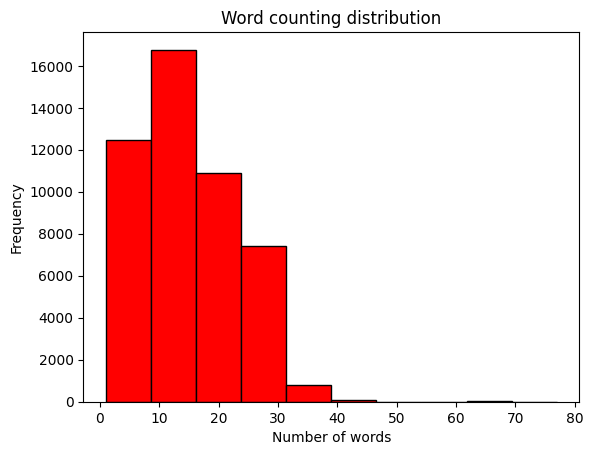

In [9]:
# Plot a histogram for the word count distribution
plt.hist(total_words, bins=10, color='red', edgecolor='black')
plt.title('Word counting distribution')
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.show()

2.2 *Average sentence length*

In [10]:
# Get the average sentence length based on the number of words
average_sentence_length = np.mean(total_words)
print(f"Average sentence length: {round(average_sentence_length)} words")

Average sentence length: 15 words


2.3 *Vocabulary size*

In [11]:
# Store unique words and get the length
vocabulary = set()
for processed_tweet in processed_tweets:
    vocabulary.update(processed_tweet['tweet'])
vocabulary_size = len(vocabulary)
print(f"Vocabulary size: {vocabulary_size} unique words")

Vocabulary size: 77190 unique words


2.4 *Ranking of most retweeted tweets*

In [12]:
# Sort the processed tweets by the 'retweets' in descending order and print the ranking (top-10)
top_retweeted = sorted(processed_tweets, key=lambda x: x['retweets'], reverse=True)[:10]
for i, tweet in enumerate(top_retweeted, start=1):
    print(f"\nRank {i} ({tweet['retweets']} RTs): {' '.join(tweet['tweet'])}")


Rank 1 (6164 RTs): there farmersprotest happen germani german govt didn’t block path barb wire dig highway label antin neither govt declar ‘intern matter’ other can’t comment guess that’ democraci work httpstcopztigtgwt8

Rank 2 (4673 RTs): disha ravi 21yearold climat activist arrest delhi polic share toolkit gretathunberg post support farmersprotest disha’ arrest alarm world need pay attent freedisharavi httpstcoiygslpnjwz

Rank 3 (3742 RTs): disha ravi broke court room told judg mere edit two line toolkit support farmer wrong nation treat anyon spread awar farmersprotest

Rank 4 (3332 RTs): farmer sweet y’all see amandacerni rihanna 🖤🥺 farmersprotest modiwherearemissingfarm releasedetainedfarm httpstcostvwhwvbvq

Rank 5 (3230 RTs): india target young women silenc dissent amp muzzl free speech 21yo climat activist disharavi arrest tweet benign googl doc farmersprotest bjp minist call “eradication” amp onlin armi joke custodi rape

Rank 6 (3182 RTs): bollywood betray panjab amp farmer

2.5 *Word clouds for the most frequent words*

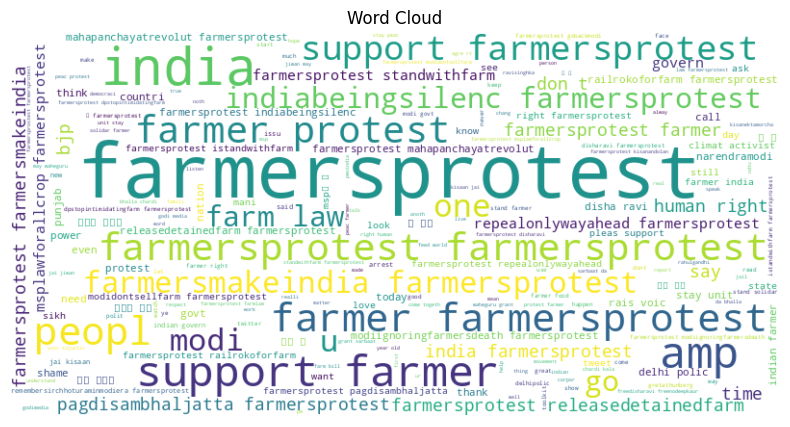

In [13]:
# Combine all words, generate the WordCloud and plot it
all_words = ' '.join([' '.join(tweet['tweet']) for tweet in processed_tweets])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

2.6 *Entity recognition*

In [14]:
# Entity recognition for top-10 most retweeted tweets
nlp_english = spacy.load("en_core_web_sm")
for tweet in top_retweeted:
    text = ' '.join(tweet['tweet'])
    print(f"\nTweet Content: {text}")
    processed_tweet = nlp_english(text)
    entities = [(entity.text, entity.label_) for entity in processed_tweet.ents]
    for entity, label in entities:
        print(f"  Entity: {entity}, Label: {label}")


Tweet Content: there farmersprotest happen germani german govt didn’t block path barb wire dig highway label antin neither govt declar ‘intern matter’ other can’t comment guess that’ democraci work httpstcopztigtgwt8
  Entity: germani, Label: ORG
  Entity: german, Label: NORP
  Entity: antin, Label: ORG
  Entity: govt, Label: ORG

Tweet Content: disha ravi 21yearold climat activist arrest delhi polic share toolkit gretathunberg post support farmersprotest disha’ arrest alarm world need pay attent freedisharavi httpstcoiygslpnjwz
  Entity: 21yearold, Label: CARDINAL

Tweet Content: disha ravi broke court room told judg mere edit two line toolkit support farmer wrong nation treat anyon spread awar farmersprotest
  Entity: two, Label: CARDINAL

Tweet Content: farmer sweet y’all see amandacerni rihanna 🖤🥺 farmersprotest modiwherearemissingfarm releasedetainedfarm httpstcostvwhwvbvq

Tweet Content: india target young women silenc dissent amp muzzl free speech 21yo climat activist disharavi

2.7 *Sentiment Analysis*

In [15]:
# Perform Sentiment Analysis on the top-10 most retweeted tweets
sentiments = []
for tweet in top_retweeted:
    text = ' '.join(tweet['tweet'])
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    sentiments.append(sentiment_score)
    print(f"\nTweet Content: {text}")
    print(f"  Sentiment Score: {sentiment_score:.2f}")

# Calculate and display the average sentiment score
if sentiments:
    average_sentiment = sum(sentiments) / len(sentiments)
    print(f"\nAverage Sentiment Score: {average_sentiment:.2f}")
else:
    print("\nNo sentiment scores available to calculate the average.")


Tweet Content: there farmersprotest happen germani german govt didn’t block path barb wire dig highway label antin neither govt declar ‘intern matter’ other can’t comment guess that’ democraci work httpstcopztigtgwt8
  Sentiment Score: -0.06

Tweet Content: disha ravi 21yearold climat activist arrest delhi polic share toolkit gretathunberg post support farmersprotest disha’ arrest alarm world need pay attent freedisharavi httpstcoiygslpnjwz
  Sentiment Score: -0.05

Tweet Content: disha ravi broke court room told judg mere edit two line toolkit support farmer wrong nation treat anyon spread awar farmersprotest
  Sentiment Score: -0.50

Tweet Content: farmer sweet y’all see amandacerni rihanna 🖤🥺 farmersprotest modiwherearemissingfarm releasedetainedfarm httpstcostvwhwvbvq
  Sentiment Score: 0.35

Tweet Content: india target young women silenc dissent amp muzzl free speech 21yo climat activist disharavi arrest tweet benign googl doc farmersprotest bjp minist call “eradication” amp onli